<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
# loading the data:
customers = pd.read_csv("../data/Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
customers.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [13]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [10]:
#You code here
import numpy as np
import pandas as pd


# Calcula la matriz de covarianza
cov_matrix = np.cov(customers.values.T)

# Convierte la matriz de covarianza en un DataFrame
cov_df = pd.DataFrame(cov_matrix, columns=customers.columns, index=customers.columns)

# Imprime la matriz de covarianza
print(cov_df)


                      Channel      Region         Fresh          Milk  \
Channel              0.219072    0.022479 -1.001431e+03  1.591511e+03   
Region               0.022479    0.599498  5.413960e+02  1.845044e+02   
Fresh            -1001.431156  541.395998  1.599549e+08  9.381789e+06   
Milk              1591.510799  184.504437  9.381789e+06  5.446997e+07   
Grocery           2707.889812   56.625813 -1.424713e+06  5.108319e+07   
Frozen            -459.096397  -79.101833  2.123665e+07  4.442612e+06   
Detergents_Paper  1419.357559   -5.473509 -6.147826e+06  2.328834e+07   
Delicassen          73.932564   98.722008  8.727310e+06  8.457925e+06   

                       Grocery        Frozen  Detergents_Paper    Delicassen  
Channel           2.707890e+03 -4.590964e+02      1.419358e+03  7.393256e+01  
Region            5.662581e+01 -7.910183e+01     -5.473509e+00  9.872201e+01  
Fresh            -1.424713e+06  2.123665e+07     -6.147826e+06  8.727310e+06  
Milk              5.108319

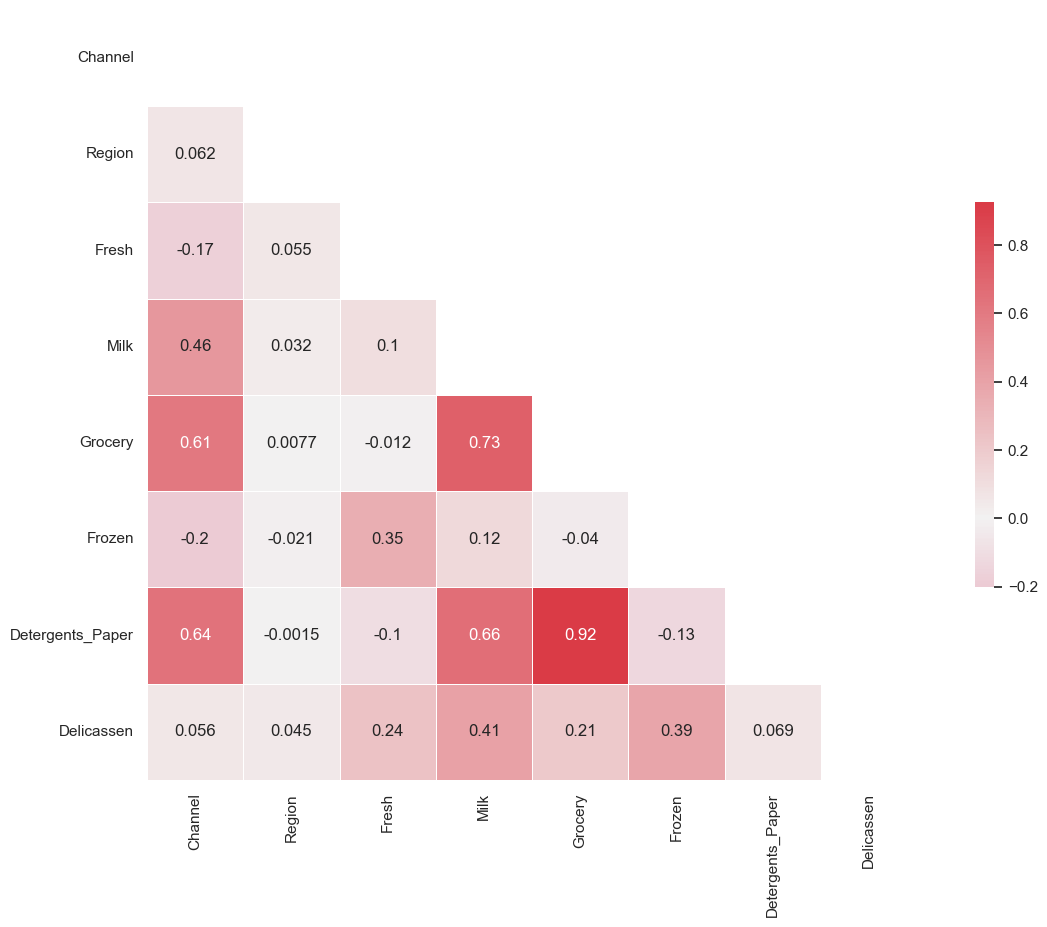

In [12]:
#You code here
#  Create a heatmap using `seaborn` to visualize which columns have high collinearity.
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(customers.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(customers.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

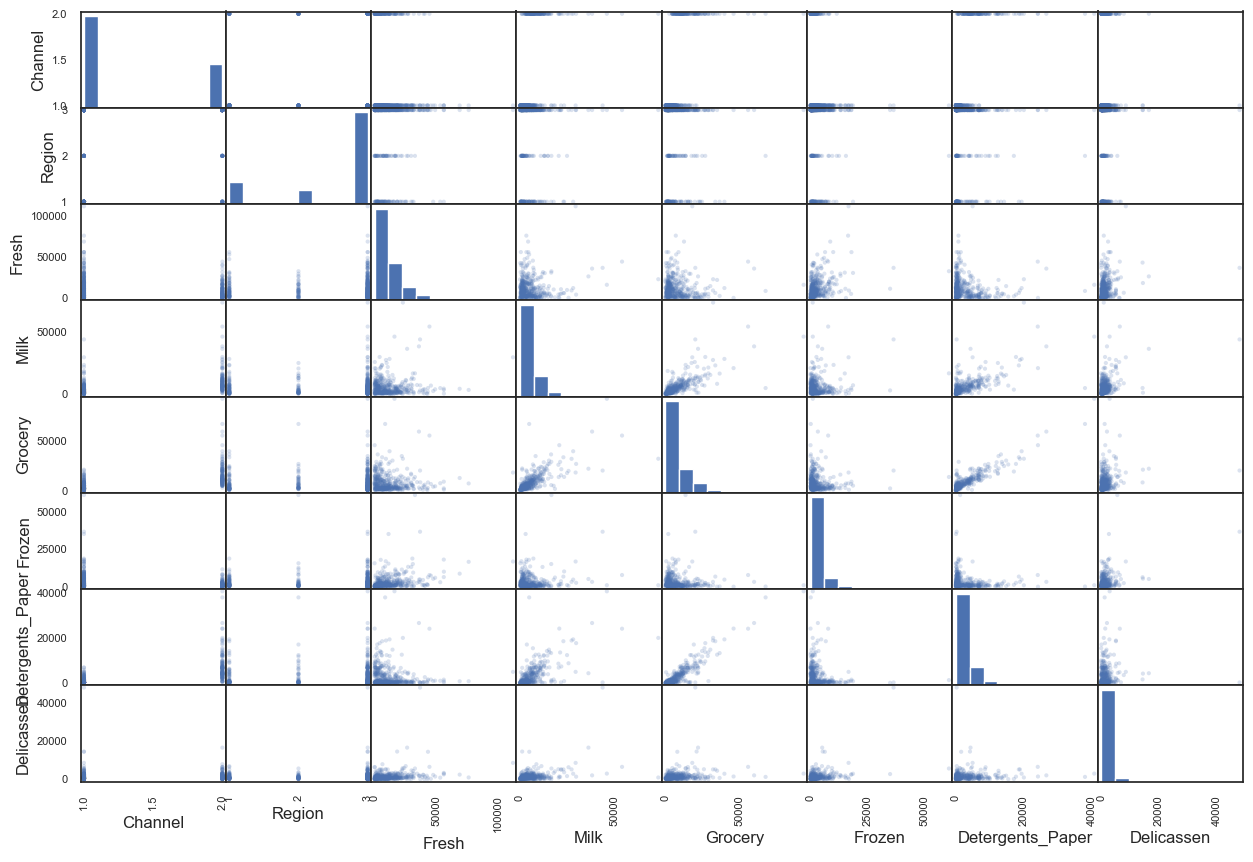

In [16]:
# You will create a correlation matrix using the numeric columns in the dataset.
# scatter matrix

pd.plotting.scatter_matrix(customers, figsize=(15, 10), alpha=0.2);

In [36]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con columnas numéricas
columnas_numericas = customers.select_dtypes(include=['float64', 'int64'])  # Filtra las columnas numéricas

sesgo = columnas_numericas.skew()  # Calcula el sesgo para cada columna

# Imprime los resultados
print(sesgo)


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


**Your observations here**
Al observar los datos proporcionados, podemos hacer varias conclusiones:

1. El DataFrame contiene información sobre diferentes características de clientes, como el canal (Channel), la región (Region), la cantidad de productos frescos (Fresh), leche (Milk), comestibles (Grocery), congelados (Frozen), productos de papel y detergentes (Detergents_Paper) y productos delicatessen (Delicassen).

2. El DataFrame consta de 440 filas y 8 columnas.

3. Las columnas 'Channel' y 'Region' son variables categóricas representadas como números enteros.

4. Las demás columnas, como 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' y 'Delicassen', son variables numéricas.

5. Al examinar la matriz de covarianza, podemos ver las relaciones entre las diferentes variables. Por ejemplo, hay una fuerte correlación positiva entre 'Grocery' y 'Detergents_Paper', lo que sugiere que los clientes que compran más comestibles también tienden a comprar más productos de papel y detergentes.

6. Al calcular el sesgo (skewness), podemos ver que algunas columnas presentan valores de sesgo significativos. Por ejemplo, las columnas 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' y 'Delicassen' tienen sesgos positivos, lo que indica una asimetría hacia la derecha en las distribuciones de datos. Esto implica que hay valores extremadamente altos que se alejan de la media en estas columnas.

7. Al examinar las estadísticas descriptivas, podemos observar los valores mínimo, máximo, promedio, desviación estándar y los cuartiles de cada columna. Esto nos proporciona una idea de la dispersión y la centralidad de los datos.

En resumen, este análisis inicial del DataFrame nos brinda información sobre las características de los clientes y las relaciones entre las variables. También nos indica la existencia de valores atípicos y asimetrías en las distribuciones de algunas columnas, lo que puede requerir una mayor exploración y procesamiento de los datos antes de realizar análisis más avanzados o modelado.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [38]:
customers.shape

(440, 8)

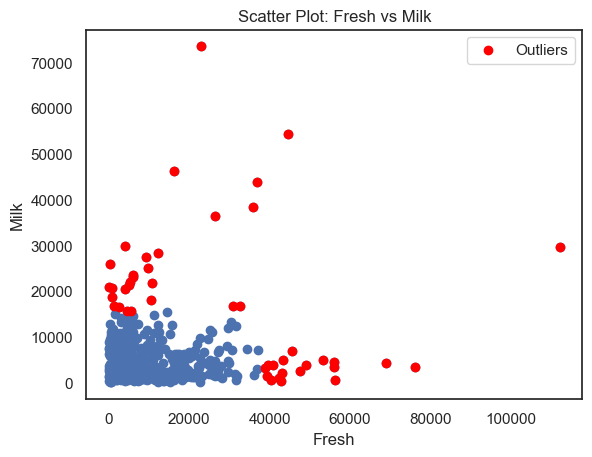

In [41]:


# Scatter plot para Fresh y Milk
plt.scatter(customers['Fresh'], customers['Milk'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter Plot: Fresh vs Milk')

# Resaltar valores atípicos
outliers = (customers < lower_bound) | (customers > upper_bound)
outlier_indices = outliers['Fresh'] | outliers['Milk']
plt.scatter(customers.loc[outlier_indices, 'Fresh'], customers.loc[outlier_indices, 'Milk'], color='red', label='Outliers')

plt.legend()
plt.show()


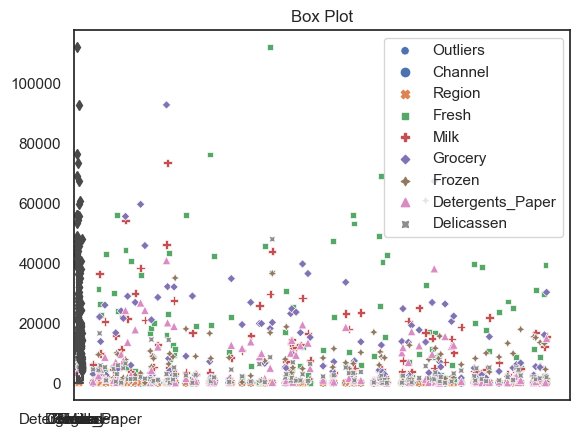

In [42]:


# Box plot para todas las variables
sns.boxplot(data=customers)
plt.title('Box Plot')

# Resaltar valores atípicos
outliers = (customers < lower_bound) | (customers > upper_bound)
outlier_indices = outliers.any(axis=1)
sns.scatterplot(data=customers.loc[outlier_indices], color='red', label='Outliers')

plt.legend()
plt.show()


In [39]:
#El df no tiene valores nulos, así que no haremos nada en este aspecto. Comenzaremos por el manejo de valores atípicos.

# Calcula los cuartiles
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica los valores atípicos
outliers = (customers < lower_bound) | (customers > upper_bound)

# Opcional: Elimina las filas que contienen valores atípicos
cleaned_df = customers[~outliers.any(axis=1)]

In [40]:
cleaned_df.shape

(332, 8)

In [45]:
"""Transformación logarítmica: Puedes utilizar la función np.log() para aplicar una transformación logarítmica a una variable.  
Esto es útil cuando la variable tiene un sesgo positivo."""

# Aplicar transformación logarítmica a la variable 'Fresh'
cleaned_df['Fresh_log'] = np.log(cleaned_df['Fresh'])


C:\Users\GAMM\AppData\Local\Temp\ipykernel_19948\3994926123.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Fresh_log'] = np.log(cleaned_df['Fresh'])


In [46]:
"""Transformación raíz cuadrada: Puedes utilizar la función np.sqrt() para aplicar una transformación de raíz cuadrada a una variable.  
Esto puede ayudar a corregir el sesgo positivo."""

# Aplicar transformación de raíz cuadrada a la variable 'Milk'
cleaned_df['Milk_sqrt'] = np.sqrt(cleaned_df['Milk'])


C:\Users\GAMM\AppData\Local\Temp\ipykernel_19948\275331877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Milk_sqrt'] = np.sqrt(cleaned_df['Milk'])


In [47]:
"""Transformación Box-Cox: La transformación Box-Cox es útil cuando la variable no sigue una distribución normal.   
Puedes utilizar la función scipy.stats.boxcox() para aplicar esta transformación."""
from scipy.stats import boxcox

# Aplicar transformación Box-Cox a la variable 'Grocery'
cleaned_df['Grocery_boxcox'], lambda_ = boxcox(cleaned_df['Grocery'])


C:\Users\GAMM\AppData\Local\Temp\ipykernel_19948\3634058217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Grocery_boxcox'], lambda_ = boxcox(cleaned_df['Grocery'])


In [51]:
"""Esto creará nuevas columnas en el DataFrame 'df_encoded' correspondientes a cada categoría de las variables 'Channel' y 'Region',    
con valores binarios (0 o 1) indicando la presencia o ausencia de cada categoría."""

# Realizar codificación one-hot de las variables categóricas
df_encoded = pd.get_dummies(cleaned_df, columns=['Channel', 'Region'])

# Visualizar el DataFrame codificado
df_encoded.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_log,Milk_sqrt,Grocery_boxcox,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,9.446913,98.264948,32.257400,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,8.861775,99.045444,34.412494,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,9.492884,34.583233,27.426092,1,0,0,0,1
5,9413,8259,5126,666,1795,1451,9.149847,90.879040,28.960133,0,1,0,0,1
6,12126,3199,6975,480,3140,545,9.403107,56.559703,31.547018,0,1,0,0,1


**Your comment here**

+ 
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


In [52]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
customers_scale = scaler.fit_transform(customers)

# Create a new DataFrame with the scaled data
customers_scale = pd.DataFrame(customers_scale, columns=customers.columns)

# View the scaled data
print(customers_scale.head())


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


Lo que hemos hecho al aplicar la técnica de escala de características (feature scaling) es transformar los valores de nuestro conjunto de datos de manera que tengan una media de cero y una varianza unitaria. Esto es útil porque muchas técnicas de aprendizaje automático y algoritmos de clustering se basan en la suposición de que las características tienen una distribución normal con una media de cero y una varianza unitaria.

Al realizar la escala de características, logramos varios beneficios:

1. Normalización de los datos: Al escalar los datos, podemos llevar todas las características a una escala similar, lo que evita que una característica con valores grandes domine sobre las demás. Esto es especialmente importante en algoritmos sensibles a las escalas de las características, como el algoritmo de K-Means.

2. Mejora de la convergencia: Al tener características en una escala similar, los algoritmos de clustering pueden converger más rápidamente y de manera más estable. Esto es especialmente útil en algoritmos iterativos que buscan encontrar centroides o grupos óptimos.

3. Reducción del impacto de los valores atípicos: La escala de características también puede reducir el impacto de los valores atípicos en los resultados del clustering. Los valores atípicos pueden tener un efecto desproporcionado cuando las características no están escaladas, lo que puede distorsionar los resultados.

Los datos transformados después de la escala de características representan los mismos valores que los datos originales, pero están en una escala diferente. Los valores ahora tienen una media de cero y una varianza unitaria, lo que facilita la comparación y el análisis de las características.

Es importante tener en cuenta que la interpretación de los datos después de la escala de características puede ser diferente. Los valores numéricos ya no tienen la misma interpretación directa que tenían antes de la escala, pero la relación entre ellos y su distribución relativa se mantiene.

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

Clustering es una técnica utilizada para agrupar datos similares en conjuntos llamados clústeres. En este desafío, utilizaremos el algoritmo de clustering K-Means para agrupar nuestros datos en clústeres.

Para comenzar, debemos inicializar el modelo K-Means. Usaremos la implementación proporcionada por la biblioteca scikit-learn en Python. A continuación, ajustaremos nuestro conjunto de datos escalado al modelo K-Means utilizando el método .fit.

Una vez que hayamos ajustado los datos al modelo, podemos acceder a la propiedad labels_ en el objeto devuelto por el método .fit. Esta propiedad contiene las asignaciones de clúster para cada registro de datos. Lo que haremos a continuación es asignar estas etiquetas de clúster de regreso a nuestro DataFrame original customers en una nueva columna llamada 'labels'. De esta manera, podremos ver los resultados del clustering en los datos originales.

Es importante destacar que el número de clústeres se establece previamente y es un hiperparámetro que debemos elegir antes de realizar el clustering. En este caso, utilizaremos el número de clústeres predeterminado.

In [53]:
from sklearn.cluster import KMeans

# Inicializar el modelo K-Means
kmeans = KMeans()

# Ajustar los datos escalados al modelo
kmeans.fit(customers_scale)

# Obtener las etiquetas de clúster asignadas a cada registro de datos
cluster_labels = kmeans.labels_

# Asignar las etiquetas de clúster al DataFrame original
customers['labels'] = cluster_labels


Count the values in `labels`.

In [54]:
# Your code here:
customers['labels'].value_counts()

1    176
2     98
5     87
0     39
3     32
7      5
6      2
4      1
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

En este desafío, utilizaremos otro algoritmo de clustering llamado DBSCAN para agrupar nuestros datos. DBSCAN es un algoritmo de agrupamiento basado en densidad que puede identificar clústeres de forma arbitraria en función de la densidad de los puntos.

Para comenzar, debemos inicializar el modelo DBSCAN. Utilizaremos la implementación proporcionada por la biblioteca scikit-learn en Python y estableceremos el parámetro eps en 0.5, que determina la distancia máxima entre dos muestras para considerarlas vecinas.

A continuación, ajustaremos nuestros datos escalados al modelo DBSCAN utilizando el método .fit. En el objeto devuelto por el método .fit, podemos acceder a la propiedad labels_, que contiene las asignaciones de clúster para cada registro de datos.

Lo que haremos a continuación es asignar estas etiquetas de clúster de regreso a nuestro DataFrame original customers en una nueva columna llamada 'labels_DBSCAN'. De esta manera, podremos ver los resultados del clustering realizado por DBSCAN en los datos originales.

In [55]:
from sklearn.cluster import DBSCAN

# Inicializar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5)

# Ajustar los datos escalados al modelo
dbscan.fit(customers_scale)

# Obtener las etiquetas de clúster asignadas a cada registro de datos
cluster_labels_dbscan = dbscan.labels_

# Asignar las etiquetas de clúster al DataFrame original
customers['labels_DBSCAN'] = cluster_labels_dbscan



Count the values in `labels_DBSCAN`.

In [56]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Para comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos, crearemos gráficos de dispersión (scatter plots) para varias columnas. Para cada par de columnas que se mencionan a continuación, crearemos un gráfico de dispersión utilizando las etiquetas de K-Means (labels) en uno y las etiquetas de DBSCAN (labels_DBSCAN) en otro. Los colocaremos uno al lado del otro para poder compararlos. De esta manera, podremos evaluar qué algoritmo de clustering tiene más sentido.

Las columnas a visualizar son:

Detergents_Paper como eje X (horizontal) y Milk como eje Y (vertical)
Grocery como eje X y Fresh como eje Y
Frozen como eje X y Delicassen como eje Y

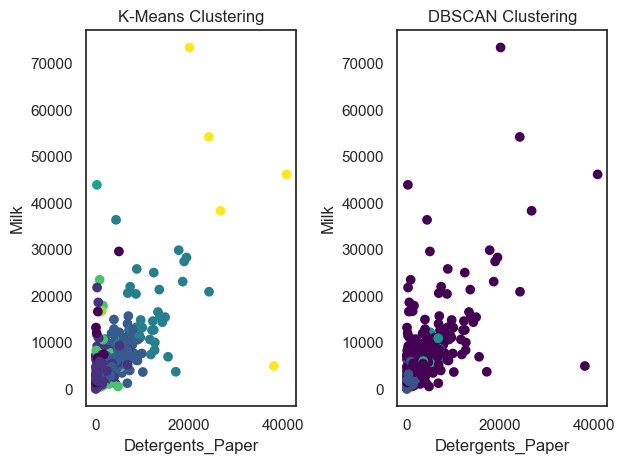

In [57]:
# Your code here:

# Gráfico de dispersión para Detergents_Paper vs. Milk
plt.subplot(1, 2, 1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'], cmap='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'], cmap='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

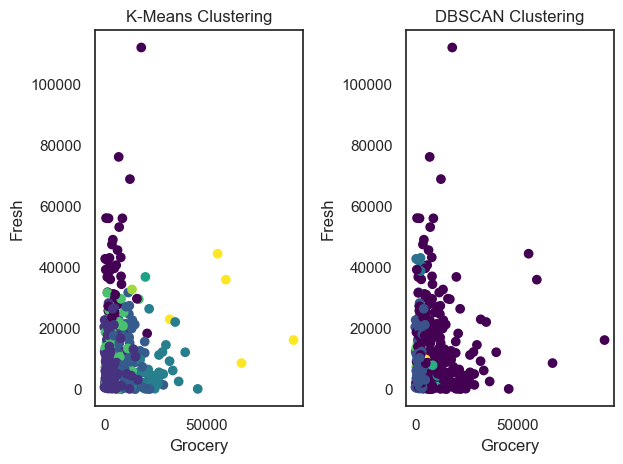

In [58]:
# Your code here:
# Gráfico de dispersión para Grocery vs. Fresh
plt.subplot(1, 2, 1)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

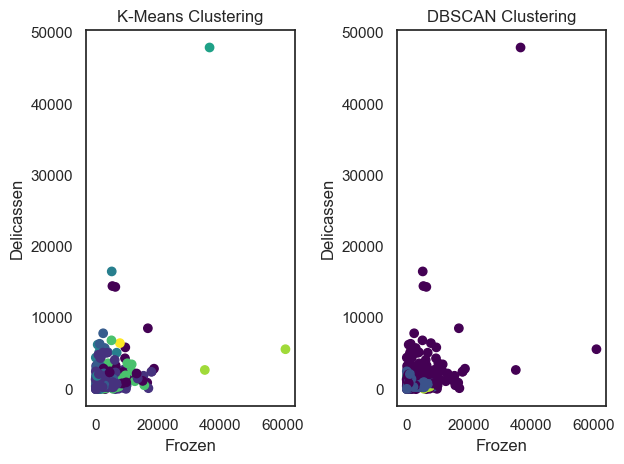

In [59]:
# Your code here:

# Gráfico de dispersión para Frozen vs. Delicassen
plt.subplot(1, 2, 1)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'], cmap='viridis')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], cmap='viridis')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()



Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [60]:
# Your code here:
# Agrupar por 'labels' y calcular las medias
means_kmeans = customers.groupby('labels').mean()

# Agrupar por 'labels_DBSCAN' y calcular las medias
means_dbscan = customers.groupby('labels_DBSCAN').mean()



In [64]:
means_kmeans.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,8.0,1.388594,0.506795,1.000000,1.000000,1.054377,2.000000,2.000000
Region,8.0,2.559184,0.555588,1.321839,2.445312,2.785191,2.850000,3.000000
Fresh,8.0,19833.537614,13531.050152,5985.437500,8762.618767,16302.772989,28414.000000,40430.512821
Milk,8.0,16613.397596,17301.337125,2940.676136,4609.327365,8735.408163,23478.368750,43950.000000
Grocery,8.0,17519.462732,19450.621232,3419.875000,5353.828470,9792.469388,21534.664062,61472.200000
Frozen,8.0,12866.005808,18453.164491,1331.816327,2437.000000,2960.576607,14178.057692,47939.000000
Detergents_Paper,8.0,6326.453357,10394.246479,239.000000,747.833807,892.306366,6715.901786,29974.200000
Delicassen,8.0,7944.379877,16195.342254,1002.562500,1381.558761,2581.946875,3077.740385,47943.000000
labels_DBSCAN,8.0,-0.378272,0.900147,-1.000000,-1.000000,-0.782051,-0.174339,1.459770


In [63]:
means_dbscan.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,9.0,1.387800,0.485643,1.000000,1.000000,1.000000,2.000000,2.000000
Region,9.0,2.383442,0.857331,1.000000,2.000000,3.000000,3.000000,3.000000
Fresh,9.0,11698.532697,11738.902293,2357.200000,6823.000000,9128.823077,11401.000000,41446.600000
Milk,9.0,4081.427279,3333.034578,1421.200000,1751.863636,1943.000000,6095.857143,10224.800000
Grocery,9.0,5882.182662,4272.595263,2161.681818,2372.666667,3383.000000,10355.000000,11862.800000
Frozen,9.0,2266.172205,1972.564365,609.600000,994.000000,1513.181818,2575.400000,6780.333333
Detergents_Paper,9.0,2248.222544,2296.020571,227.400000,386.500000,496.576923,4356.800000,5780.000000
Delicassen,9.0,943.150826,605.108428,258.200000,613.666667,741.946154,941.000000,2080.470588
labels,9.0,2.716357,1.857548,0.000000,2.000000,2.000000,5.000000,5.000000


Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

Para comparar las medias de cada columna entre los grupos de K-Means y DBSCAN, puedes seguir estos pasos:

1. Examina los DataFrames `means_kmeans` y `means_dbscan` que calculamos anteriormente. Estos DataFrames contienen las medias de cada columna para cada grupo obtenido por K-Means y DBSCAN respectivamente.

2. Compara las medias de cada columna entre los grupos. Puedes hacerlo de varias formas, por ejemplo:

   - Imprime los DataFrames `means_kmeans` y `means_dbscan` y examina las medias de cada columna visualmente.
   - Calcula las diferencias absolutas o relativas entre las medias de cada columna en los grupos de K-Means y DBSCAN.
   - Calcula la media de las diferencias entre los grupos para cada columna y compáralas.

   Al comparar las medias, busca diferencias significativas entre los grupos de K-Means y DBSCAN. Si las medias difieren considerablemente en una columna entre los grupos de un algoritmo y los grupos del otro algoritmo, eso podría indicar que ese algoritmo tiene una mejor separación o agrupación de los datos en esa columna específica.

Recuerda que esta comparación es una forma de evaluar la calidad de los grupos obtenidos por K-Means y DBSCAN en función de las medias de las variables. Sin embargo, es importante considerar otros aspectos del análisis y la interpretación de los resultados antes de concluir cuál algoritmo funciona mejor para tu conjunto de datos específico.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

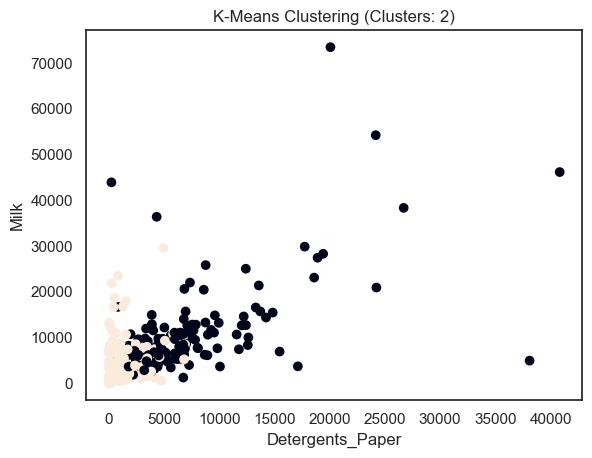

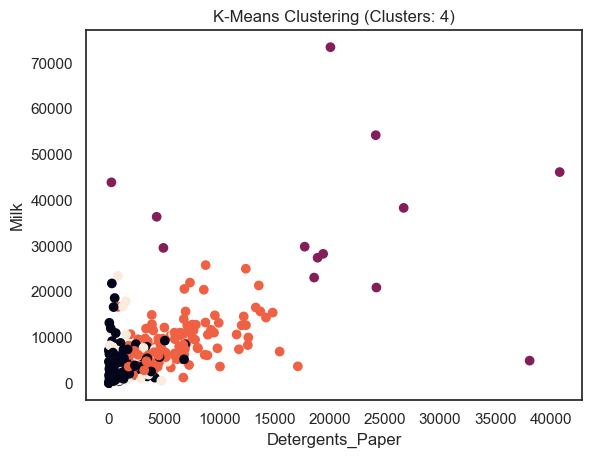

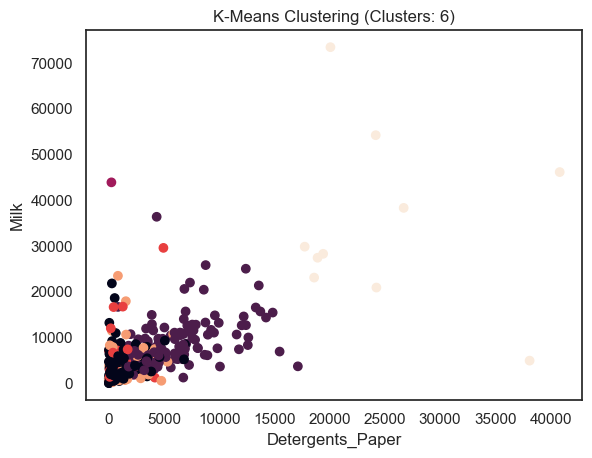

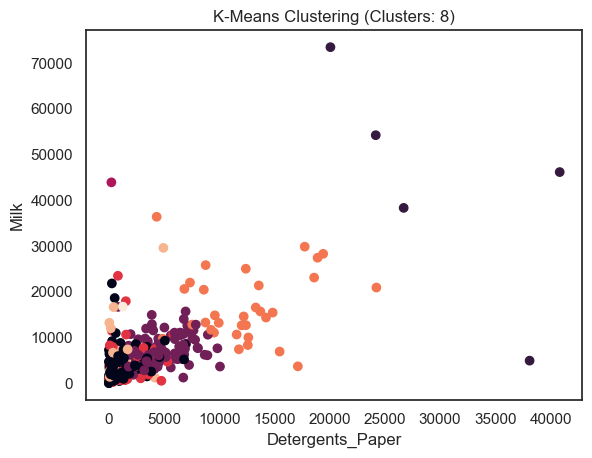

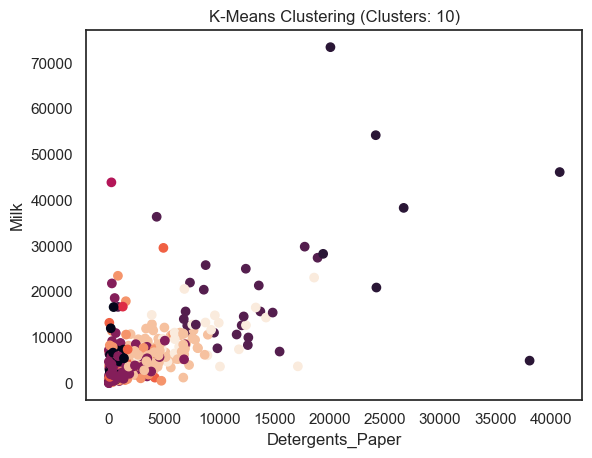

In [73]:
"""Para determinar el número óptimo de clusters en K-Means,     
podemos experimentar con diferentes valores     
y visualizar los resultados utilizando gráficos de dispersión."""

# Lista de diferentes valores para el número de clusters
num_clusters = [2, 4, 6, 8, 10]

# Iterar sobre cada valor de clusters
for n in num_clusters:
    # Inicializar el modelo K-Means con el número de clusters actual
    kmeans = KMeans(n_clusters=n, random_state=42)
    
    # Ajustar el modelo a los datos escalados
    kmeans.fit(customers_scale)
    
    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_
    
    # Asignar las etiquetas a una nueva columna en el DataFrame original
    customers['labels_KMeans'] = labels
    
    # Crear un gráfico de dispersión para los atributos 'Detergents_Paper' y 'Milk'
    plt.scatter(x=customers['Detergents_Paper'], y=customers['Milk'], c=labels)
    plt.title(f'K-Means Clustering (Clusters: {n})')
    plt.xlabel('Detergents_Paper')
    plt.ylabel('Milk')
    plt.show()


En el código anterior, estamos iterando sobre diferentes valores de num_clusters y para cada valor, inicializamos el modelo K-Means con ese número de clusters. Luego ajustamos el modelo a los datos escalados y obtenemos las etiquetas de los clusters. A continuación, asignamos las etiquetas a una nueva columna en el DataFrame original. Finalmente, creamos un gráfico de dispersión para los atributos 'Detergents_Paper' y 'Milk', donde utilizamos las etiquetas como color de los puntos.

Al ejecutar este código, obtendrás varios gráficos de dispersión, uno para cada valor de clusters. Observa visualmente los resultados y evalúa cuál número de clusters parece funcionar mejor en términos de agrupamiento de los datos.

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

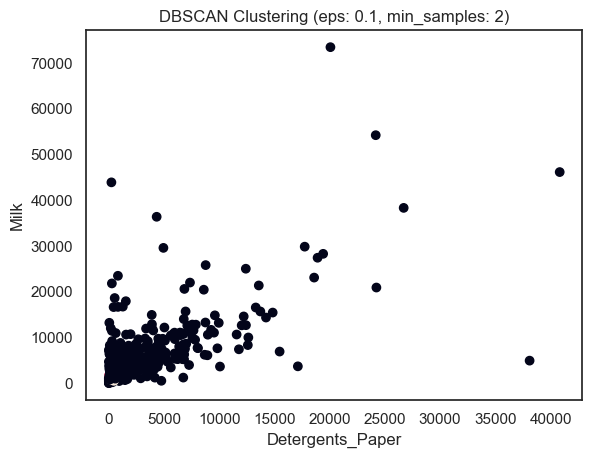

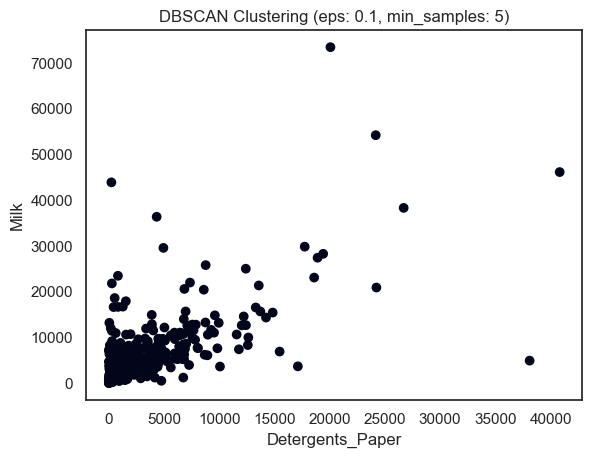

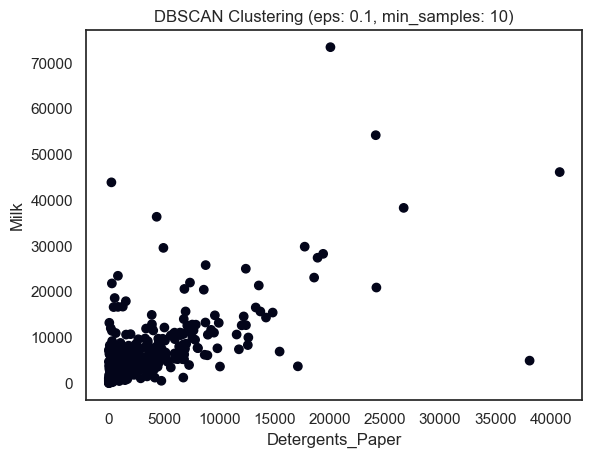

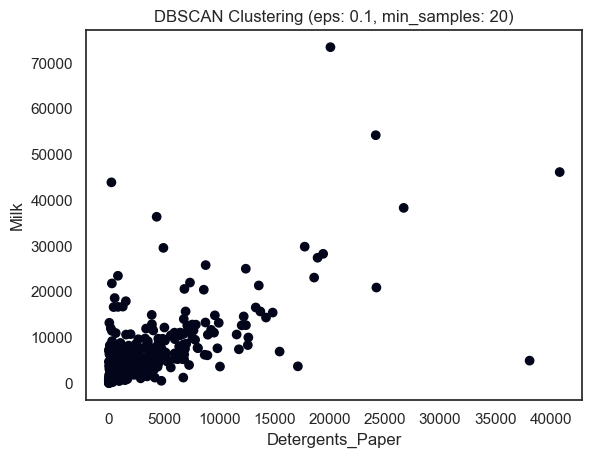

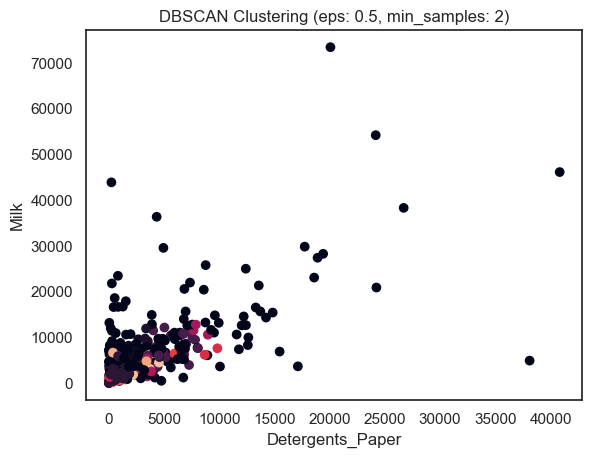

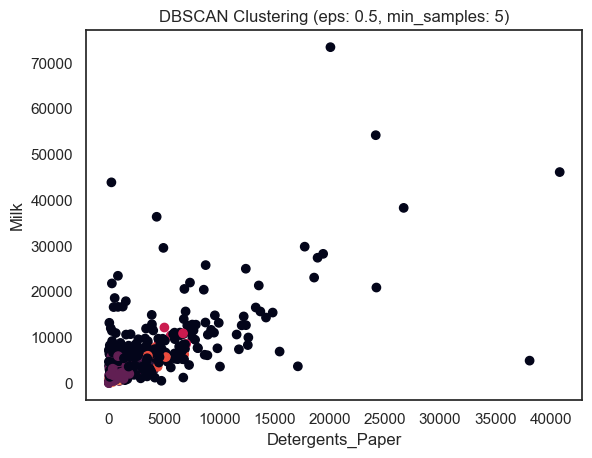

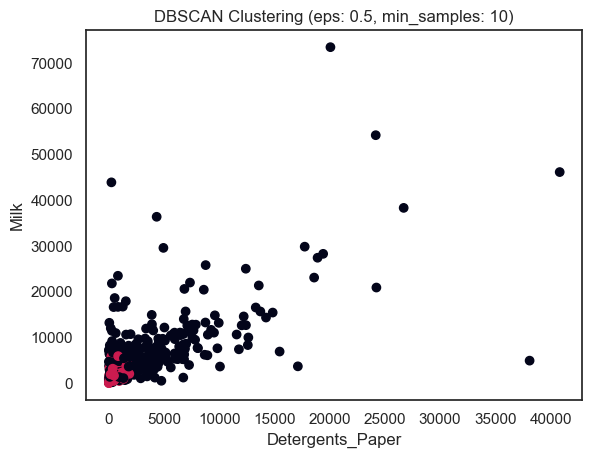

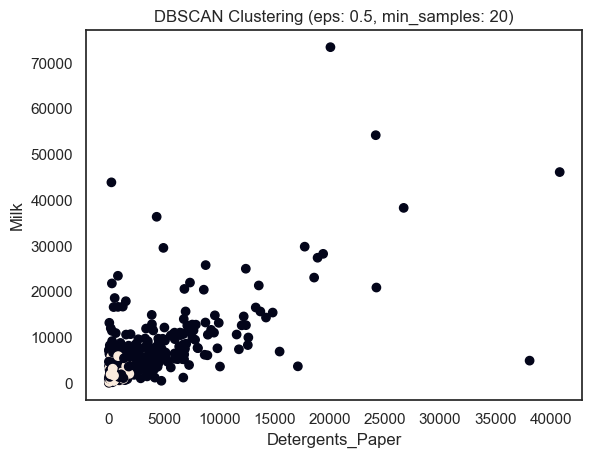

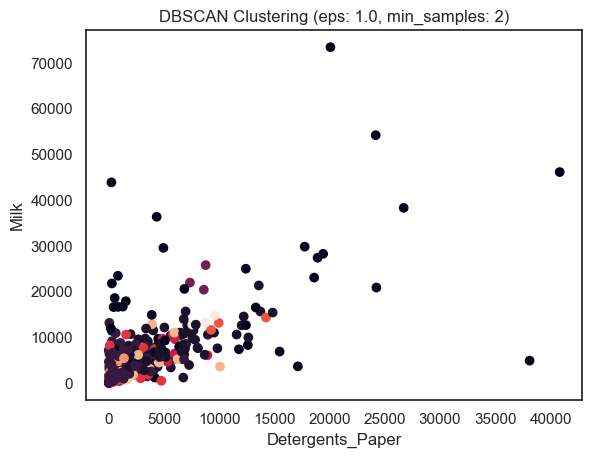

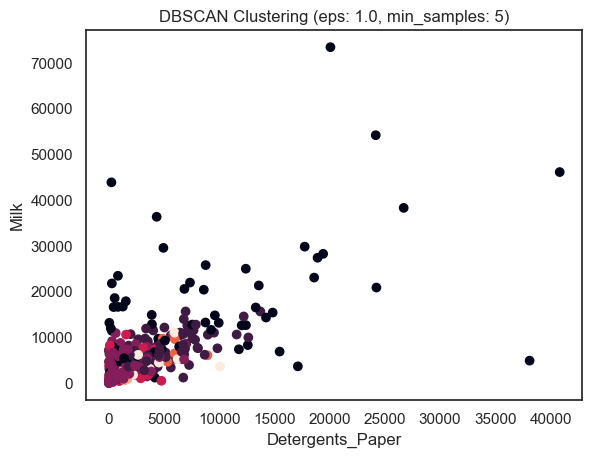

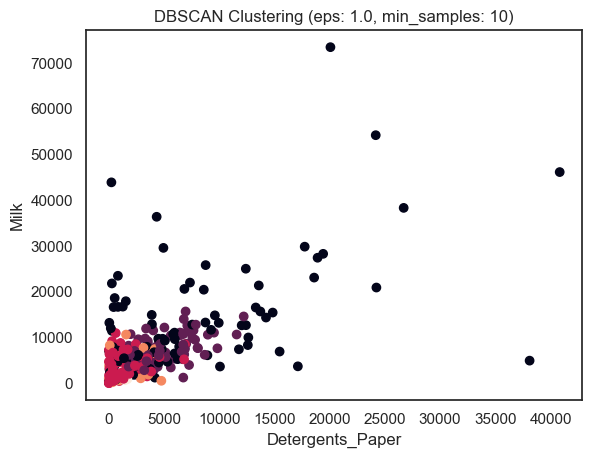

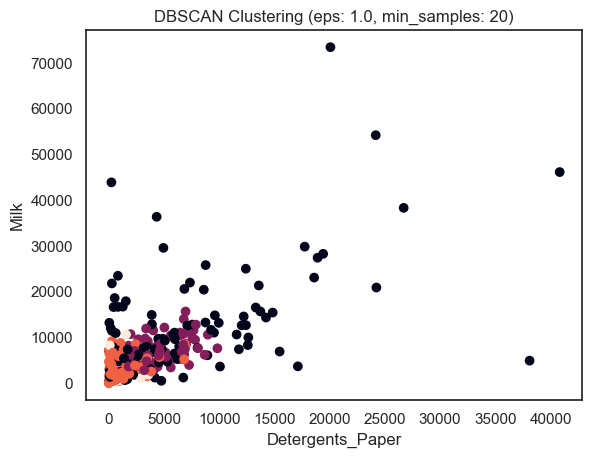

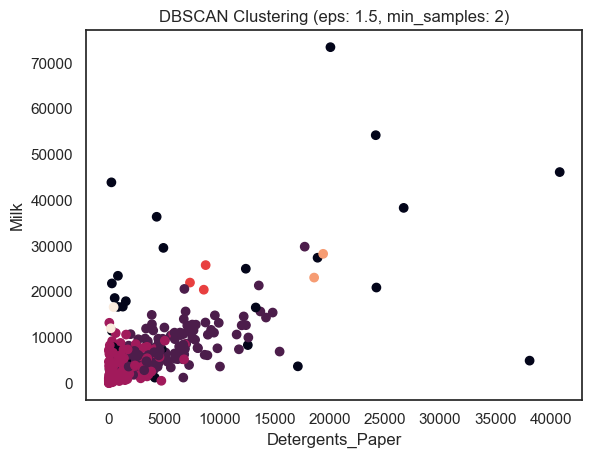

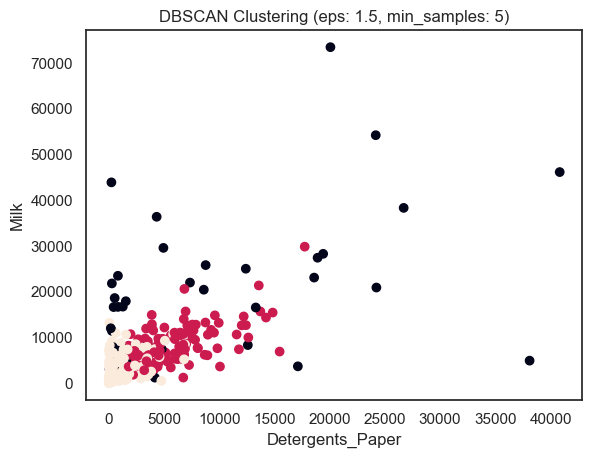

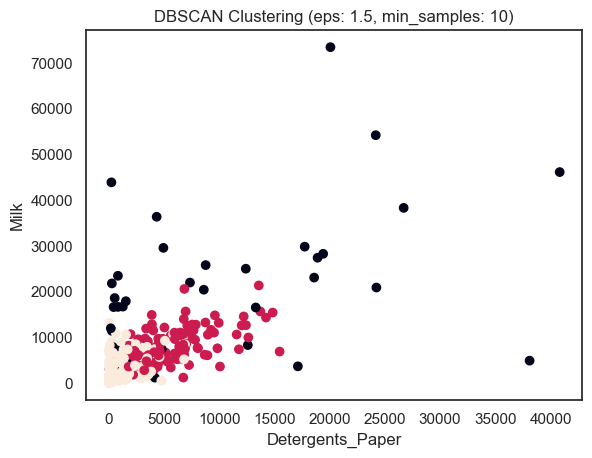

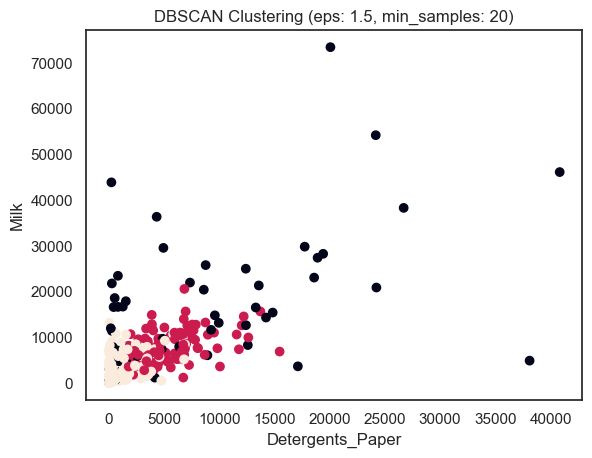

In [75]:


# Lista de diferentes valores para el parámetro eps
eps_values = [0.1, 0.5, 1.0, 1.5]

# Lista de diferentes valores para el parámetro min_samples
min_samples_values = [2, 5, 10, 20]

# Iterar sobre cada combinación de valores de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Inicializar el modelo DBSCAN con los valores actuales de eps y min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Ajustar el modelo a los datos escalados
        dbscan.fit(customers_scale)
        
        # Obtener las etiquetas de los clusters
        labels = dbscan.labels_
        
        # Asignar las etiquetas a una nueva columna en el DataFrame original
        customers['labels_DBSCAN'] = labels
        
        # Crear un gráfico de dispersión para los atributos 'Detergents_Paper' y 'Milk'
        plt.scatter(x=customers['Detergents_Paper'], y=customers['Milk'], c=labels)
        plt.title(f'DBSCAN Clustering (eps: {eps}, min_samples: {min_samples})')
        plt.xlabel('Detergents_Paper')
        plt.ylabel('Milk')
        plt.show()


En el código anterior, estamos iterando sobre diferentes combinaciones de valores de eps y min_samples. Para cada combinación, inicializamos el modelo DBSCAN con esos valores y ajustamos el modelo a los datos escalados. Luego, obtenemos las etiquetas de los clusters y las asignamos a una nueva columna en el DataFrame original. Finalmente, creamos un gráfico de dispersión para los atributos 'Detergents_Paper' y 'Milk', donde utilizamos las etiquetas como color de los puntos.

Al ejecutar este código, obtendrás varios gráficos de dispersión, uno para cada combinación de valores de eps y min_samples. Observa visualmente los resultados y evalúa cómo cambian los clusters en función de estos parámetros.

**Your comment here**

+ 
+ 
+ 
